In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn import tree

In [3]:
df = pd.read_csv('../Data/cleanedSample.csv')
df

,Longitude,Latitude,Street,Day,Violation Code,Time Range
0,49.890180,-97.142286,Donald ST,Friday,1,Daytime (9:00am-3:30pm)
1,49.897200,-97.134900,Bannatyne AVE,Thursday,1,Daytime (9:00am-3:30pm)
2,49.884645,-97.144515,Kennedy ST,Monday,13,Evening (5:00pm-11:00pm)
3,49.890795,-97.140983,St Mary AVE,Tuesday,1,Daytime (9:00am-3:30pm)
4,49.863078,-97.144373,Osborne ST,Wednesday,1,Daytime (9:00am-3:30pm)
...,...,...,...,...,...,...
99995,49.889663,-97.148775,Vaughan ST,Wednesday,13,Daytime (9:00am-3:30pm)
99996,49.887138,-97.144040,Edmonton ST,Thursday,1,Rush Hour Morning (7:30am-9:00am)
99997,49.904600,-97.157400,William AVE,Wednesday,3,Rush Hour Morning (7:30am-9:00am)
99998,49.894165,-97.136211,Pioneer AVE,Tuesday,1,Rush Hour Evening (3:30pm-5:00pm)


In [4]:
X = df.drop(['Violation Code'], axis=1)
y = df['Violation Code']

In [5]:
X = pd.get_dummies(X, columns=['Street', 'Day',"Time Range"])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object and fit it on the training data
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [29]:
# Print the best hyperparameters found
print(grid_search.best_params_)

# Make predictions on the testing data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the performance of the classifier
accuracy_score(y_test, y_pred)


{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}


0.51005

0.31535

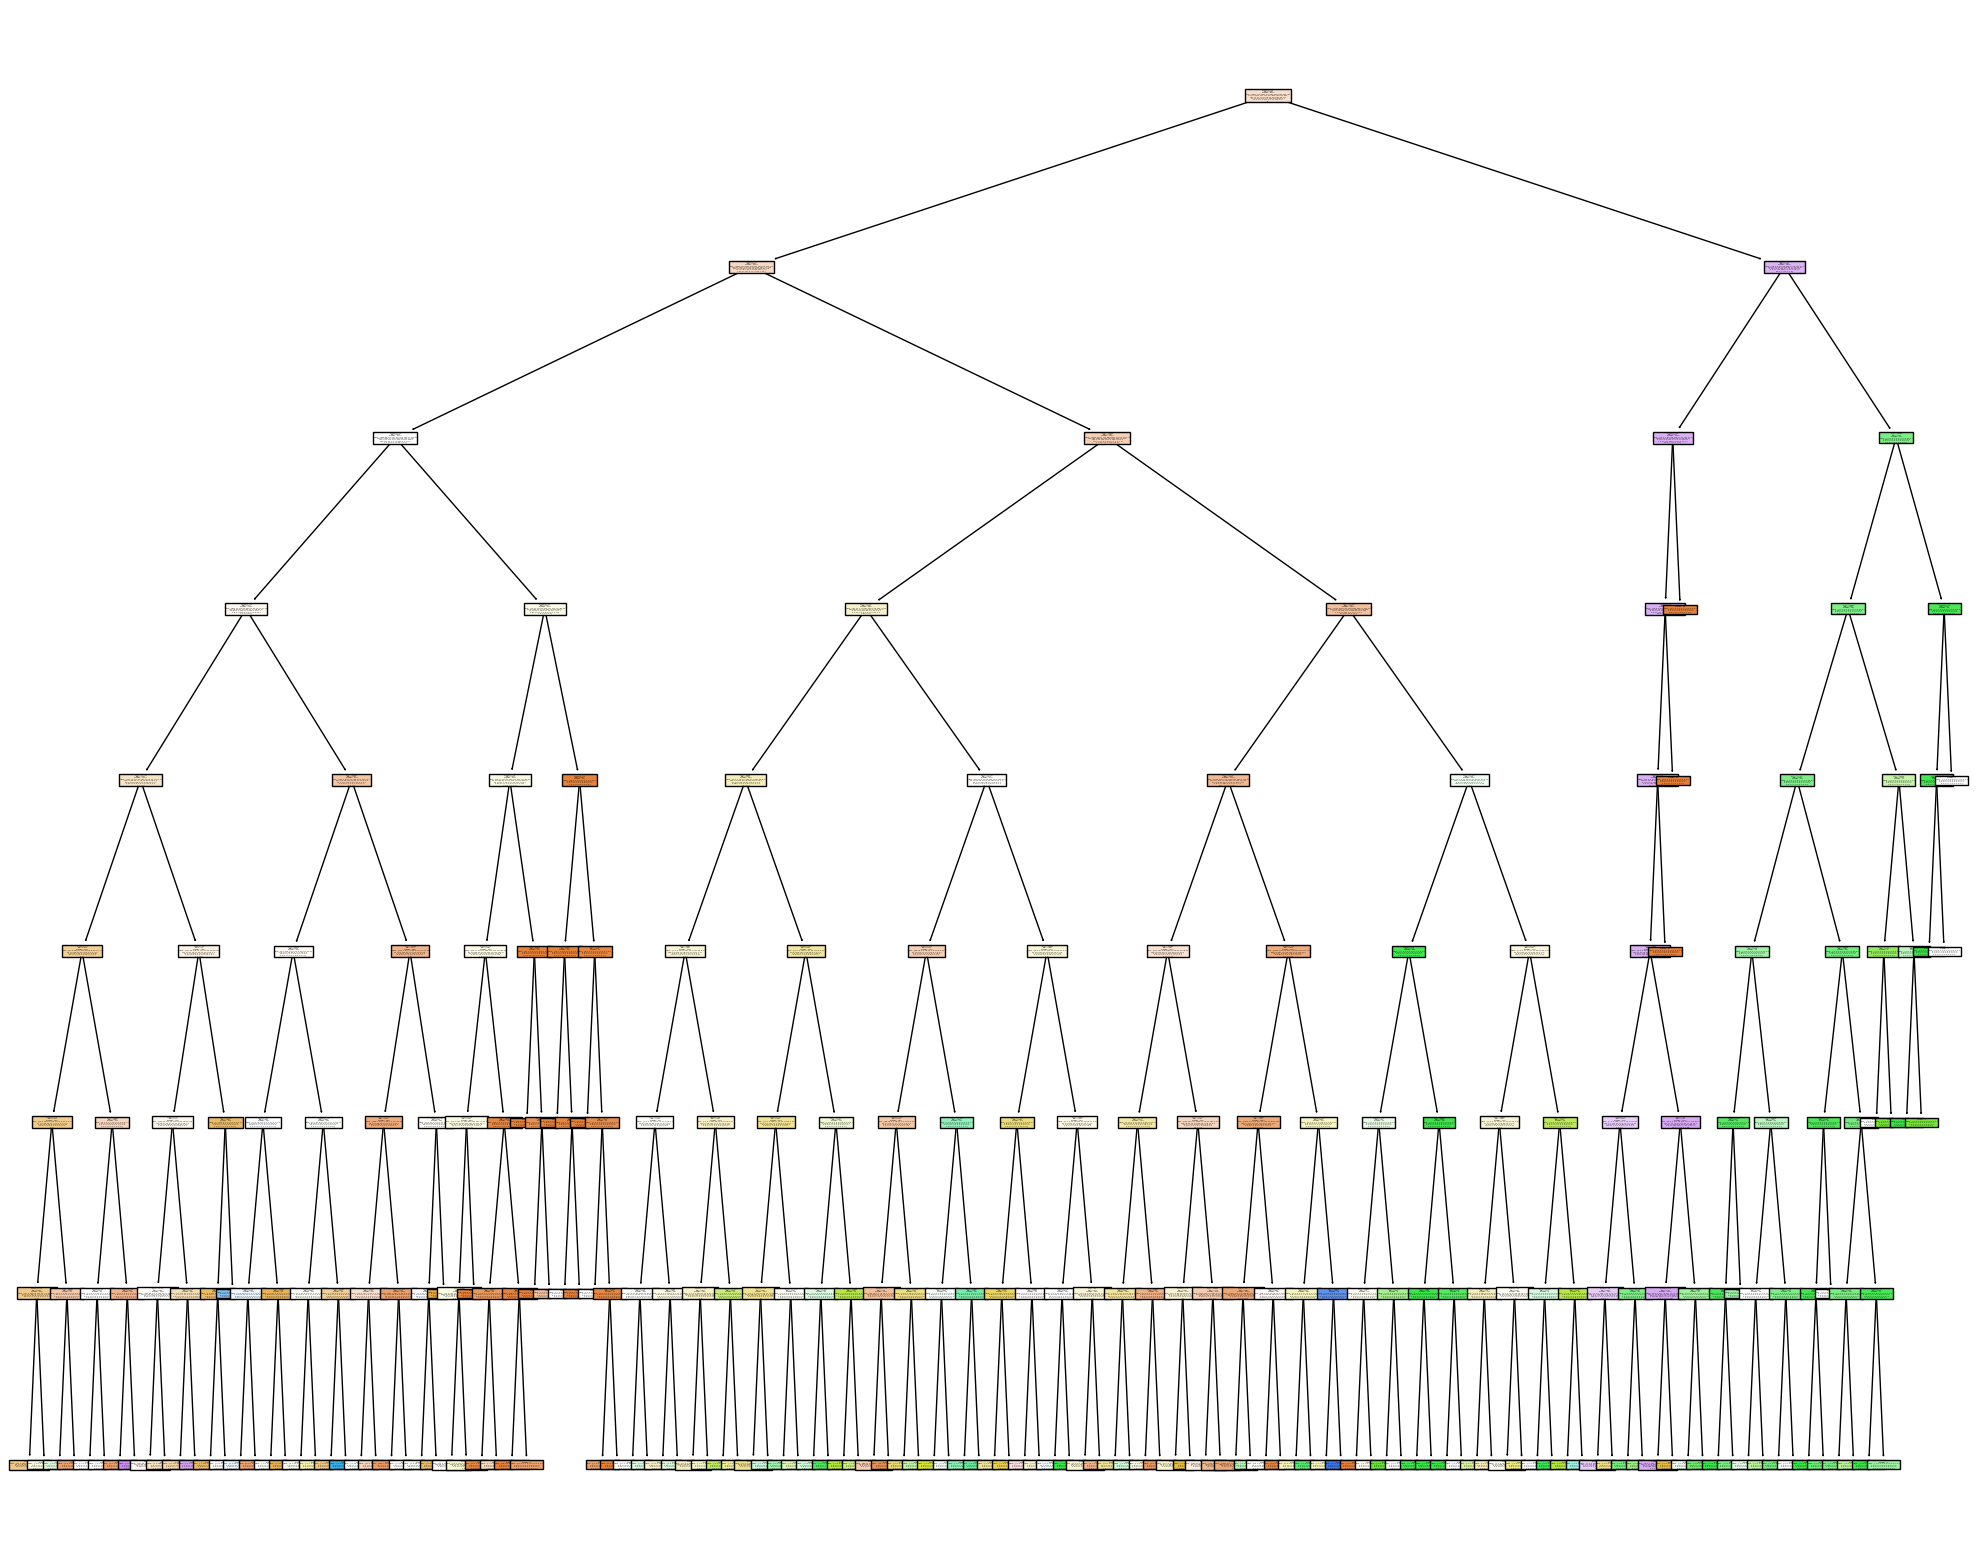

In [16]:
max_depth, min_samples_leaf,min_samples_split = 8,2,5
dt = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
dt.fit(X_train,y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,filled=True)
accuracy_score(y_test, y_pred)

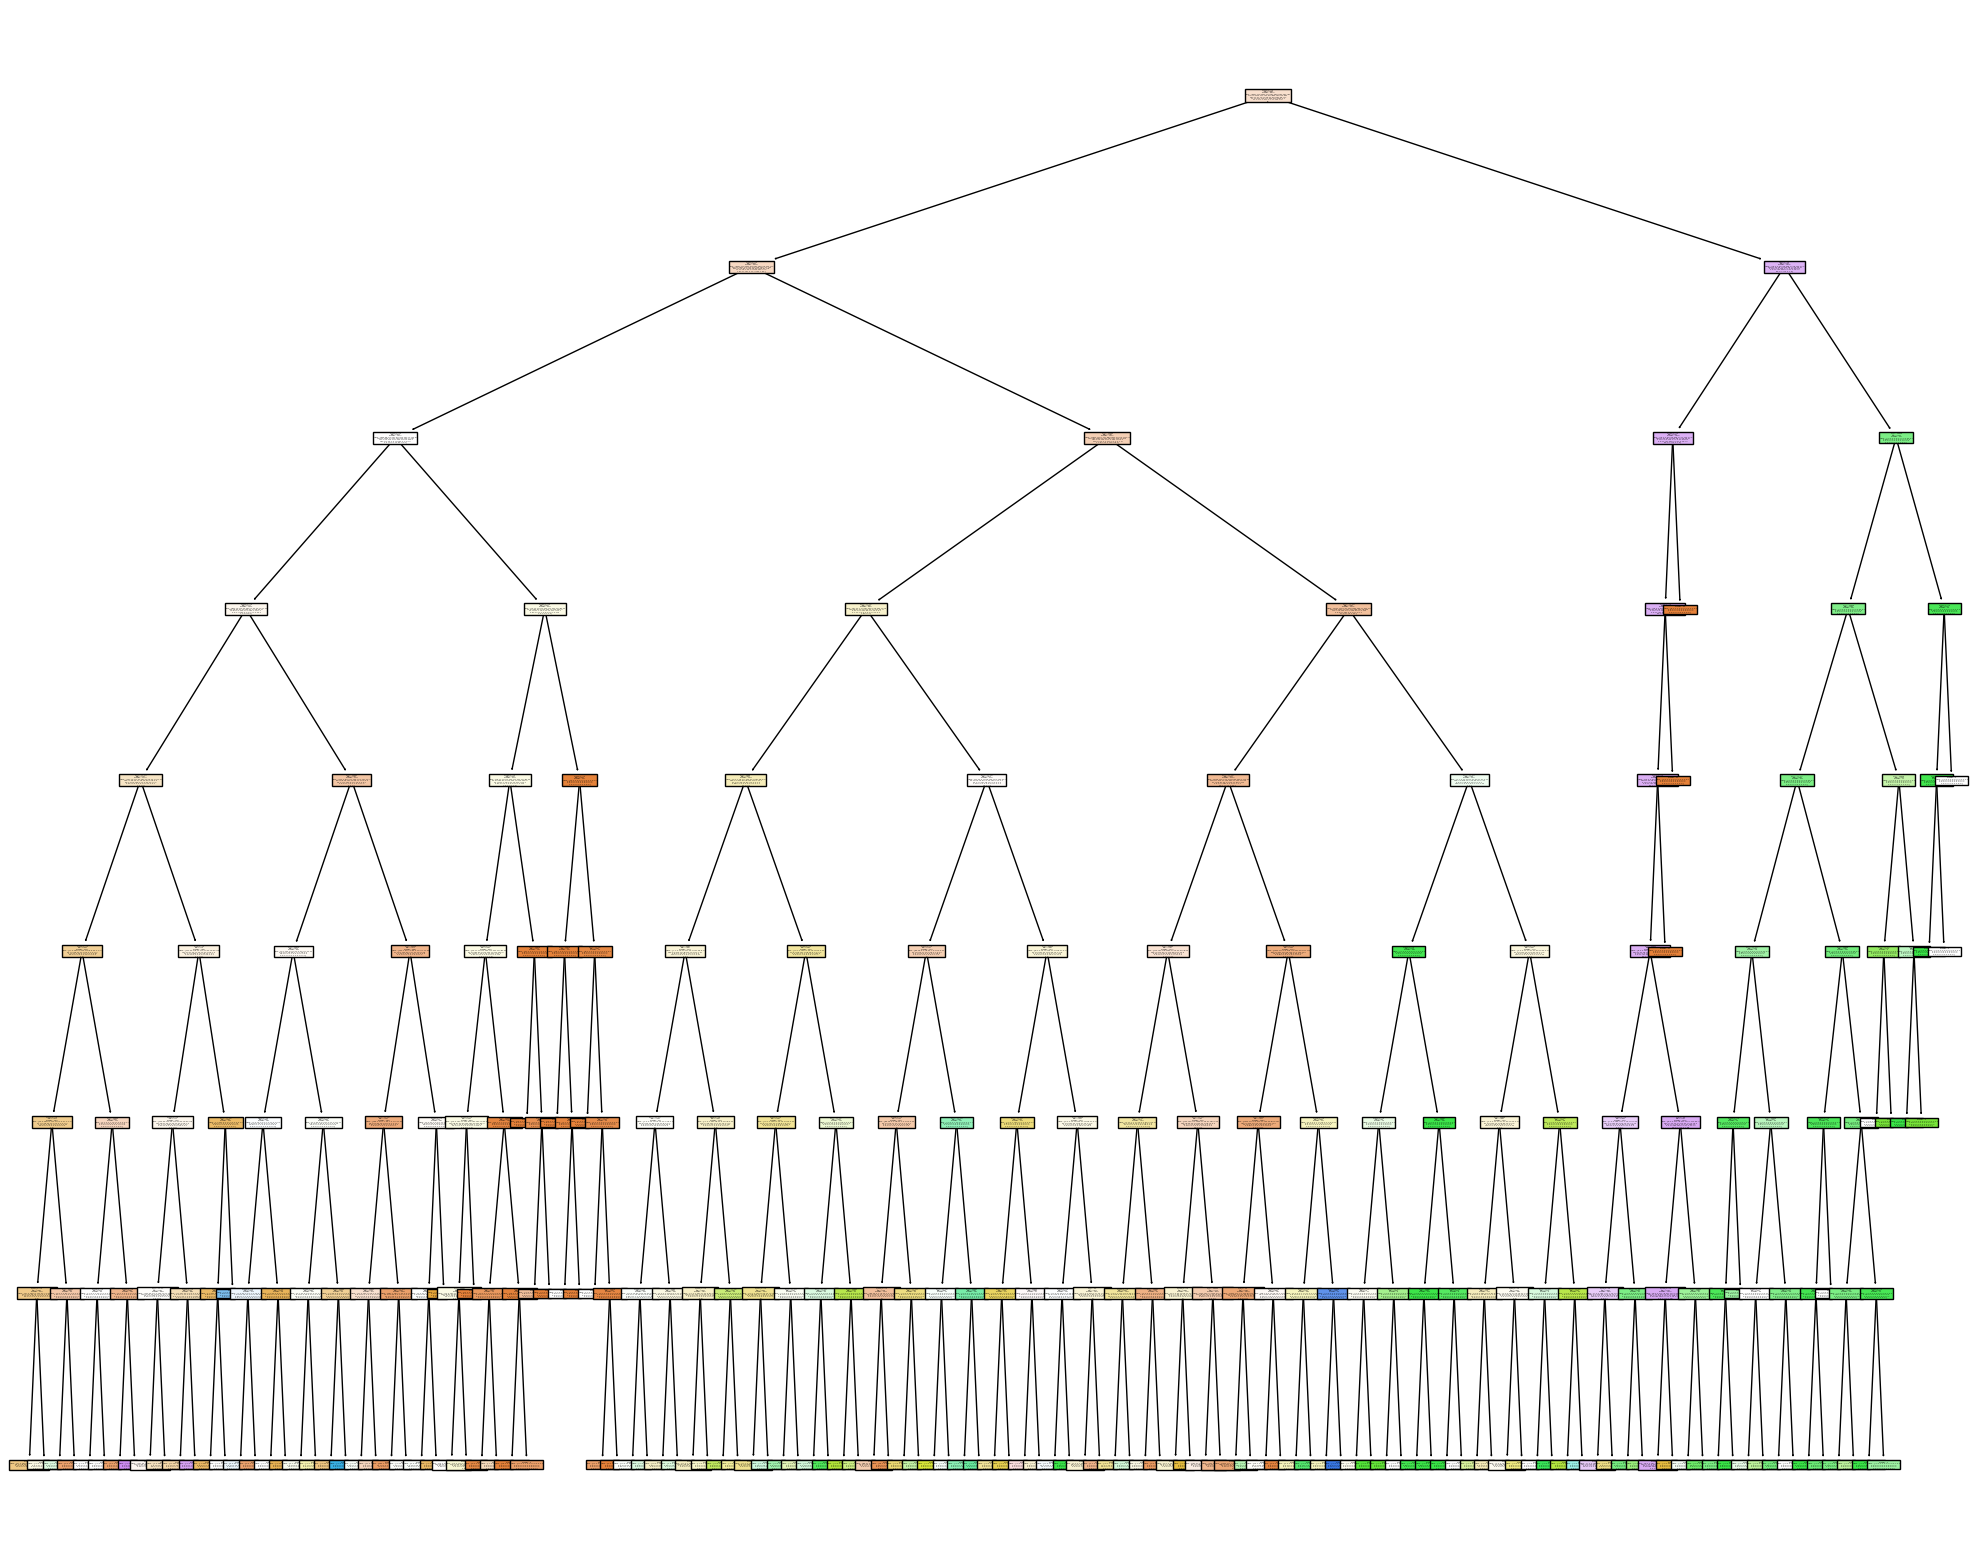

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_search.best_estimator_,filled=True)

In [12]:
# Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [13]:
# Create a GridSearchCV object and fit it on the training data
grid_search2 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search2.fit(X_train, y_train)

# Print the best hyperparameters found
print(grid_search2.best_params_)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [17]:
# Make predictions on the testing data using the best model
y_pred = grid_search2.best_estimator_.predict(X_test)

# Evaluate the performance of the classifier
accuracy_score(y_test, y_pred)

0.31535

In [20]:
rf = RandomForestClassifier(max_depth=8,min_samples_leaf=2,min_samples_split=10, n_estimators=100)
rf.fit(X_train, y_train)# Make predictions on the testing data using the best model


RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=10)

In [22]:
y_pred = rf.predict(X_test)

# Evaluate the performance of the classifier
accuracy_score(y_test, y_pred)

0.3174